In [51]:
import numpy as np
from sympy import sieve
import matplotlib.pyplot as plt
%matplotlib inline

# Problem 1

In [52]:
H1 = np.arange(2, 102, 2)
H2 = np.arange(1, 101, 2)
H3 = np.array([i**2 for i in np.arange(1, 101) if i**2 <= 100])
sieve.extend(101)
H4 = np.array([i for i in np.arange(1, 101) if i in sieve])
H5 = np.array([i for i in np.arange(1, 101) if i%5 == 0])
H6 = np.array([i for i in np.arange(1, 101) if i%10 == 0])
hlist = [H1, H2, H3, H4, H5, H6]

In [53]:
def size_principler(x, h):
    if not isinstance(x, list):
        x = [x]
    count = 0
    prob = 1/len(h)
    for i in x:
        if i in h:
            count += 1
        else:
            return 0
    return prob ** count

In [54]:
size_principler([2, 4], H1)

0.0004

<b> Each hypothesis assigns 1/len(hypothesis) as the probabilty to each element in it, and 0 as the probability to each element not in it. </b>

# Problem 2

In [55]:
listodata = [[], [50], [53], [50, 53], [16], [10, 20], [2, 4, 8], [2, 4, 8, 10]]
h_prob = 1/6
def ppd(d, h_list = hlist, hprob = h_prob):
    if not isinstance(d, list):
        d = [d]
    onehundred = []
    for i in np.arange(100):
        minprob = 0
        for n in h_list:
            if size_principler(i, n) == 0:
                continue
            else:
                a = d.copy()
                a.append(i)
                prob = size_principler(a, n)
                minprob += (prob * hprob)
        onehundred.append(minprob)
    return onehundred

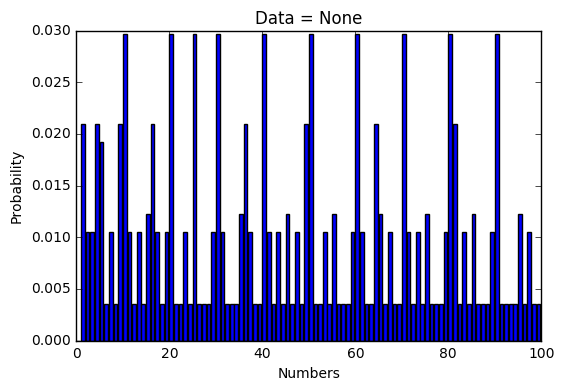

In [74]:
y = ppd([])
y = [i/sum(y) for i in y]
x = np.arange(100)
plt.bar(x, y)
plt.title("Data = None")
plt.ylabel("Probability")
plt.xlabel("Numbers")

<b> I would have assumed with no data, the probability of 1-100 being in the concept would either have been completely uniform or completely random (with this graph tending more towards the random). </b>

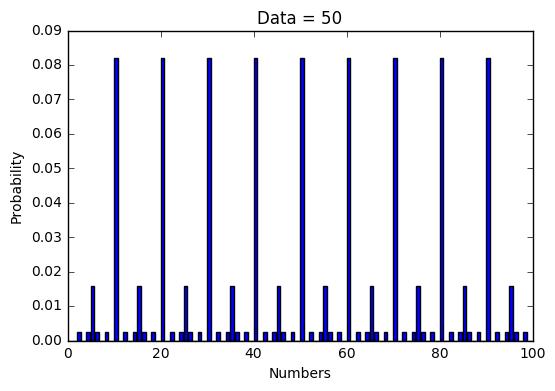

In [57]:
y = ppd([50])
y = [i/sum(y) for i in y]
x = np.arange(100)
plt.bar(x, y)
plt.title("Data = 50")
plt.ylabel("Probability")
plt.xlabel("Numbers")

<b> This has peaks at multiples of 10 and smaller peaks at multiples of 5, which is what I would have assumed (because I like easy division and 10*5=50. </b>

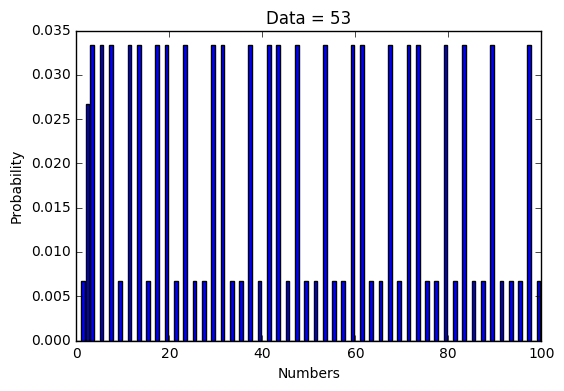

In [58]:
y = ppd([53])
y = [i/sum(y) for i in y]
x = np.arange(100)
plt.bar(x, y)
plt.title("Data = 53")
plt.ylabel("Probability")
plt.xlabel("Numbers")

<b> With a number like 53, I would have assumed...odd numbers, which this graph...relatively portrays. </b>

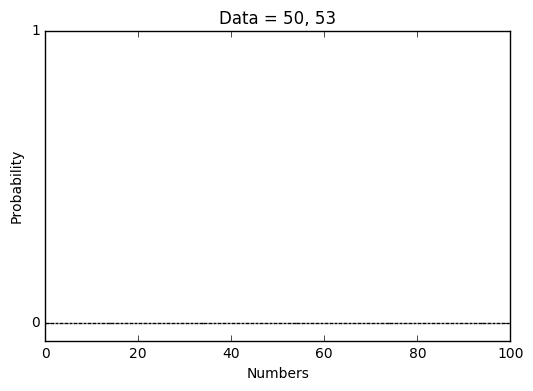

In [59]:
y = ppd([50, 53])
y = [0 for i in range(100)]
x = np.arange(100)
plt.bar(x, y)
plt.title("Data = 50, 53")
plt.yticks(range(2))
plt.ylabel("Probability")
plt.xlabel("Numbers")

<b> With both 50 and 53 not being in any hypotheses together, it makes sense that the graph would have 0 as the probability across the board. </b>

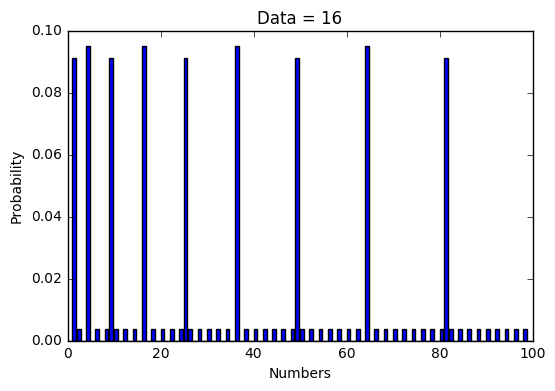

In [60]:
y = ppd([16])
y = [i/sum(y) for i in y]
x = np.arange(100)
plt.bar(x, y)
plt.title("Data = 16")
plt.ylabel("Probability")
plt.xlabel("Numbers")

<b> With just 16, I would have assumed even numbers, which this graph shows very low probability for. </b>

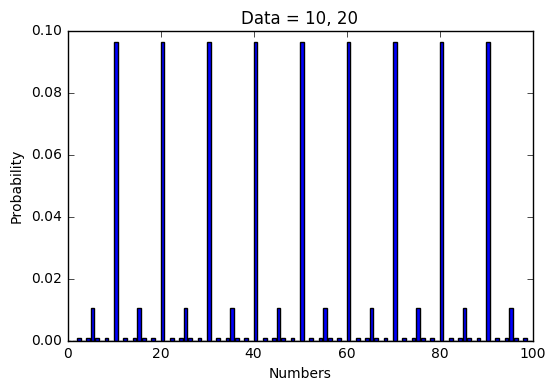

In [61]:
y = ppd([10, 20])
y = [i/sum(y) for i in y]
x = np.arange(100)
plt.bar(x, y)
plt.title("Data = 10, 20")
plt.ylabel("Probability")
plt.xlabel("Numbers")

<b> With both 10 and 20, I would assume multiples of 10, which is reflected in this graph. </b>

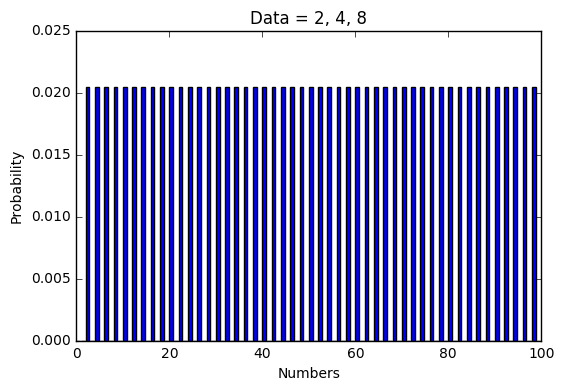

In [62]:
y = ppd([2, 4, 8])
y = [i/sum(y) for i in y]
x = np.arange(100)
plt.bar(x, y)
plt.title("Data = 2, 4, 8")
plt.ylabel("Probability")
plt.xlabel("Numbers")

<b> With 2, 4, and 8 as data, I would be relatively certain it was just even numbers, which this graph reflects. </b>

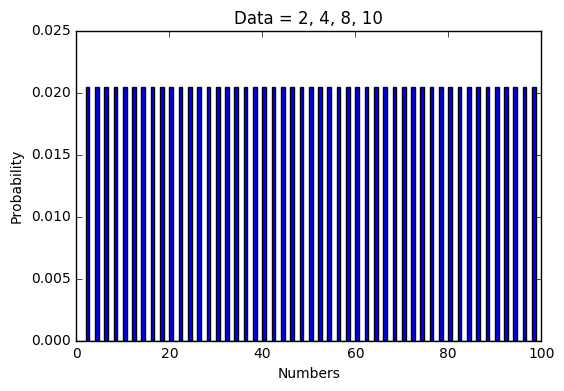

In [63]:
y = ppd([2, 4, 8, 10])
y = [i/sum(y) for i in y]
x = np.arange(100)
plt.bar(x, y)
plt.title("Data = 2, 4, 8, 10")
plt.ylabel("Probability")
plt.xlabel("Numbers")

<b> With 2, 4, 8, and 10 as numbers, I would assume with slightly more confidence than the last graph that the concept is just even numbers, which isn't really reflected in this graph (I would have expected higher probabilities but it's the same). </b>

# Problem 3

In [64]:
overall = []
sampled = [i for i in np.arange(1, 101)]
for i in np.arange(1, 101):
    x = i
    y = 0
    while x != 101:
        overall.append(sampled[y:x])
        y += 1
        x += 1
len(overall)

5050

In [65]:
def updatedppd(d, h_list = hlist, hprob = 1/7):
    if not isinstance(d, list):
        d = [d]
    onehundred = []
    for i in np.arange(100):
        minprob = hprob * ((1/5050) ** len(d))
        for n in h_list:
            if size_principler(i, n) == 0:
                continue
            else:
                a = d.copy()
                a.append(i)
                prob = size_principler(a, n)
                minprob += (prob * hprob)
        for n in overall:
            if size_principler(i, n) == 0:
                continue
            else:
                a = d.copy()
                a.append(i)
                prob = size_principler(a, n)
                minprob += (prob * (hprob/len(overall)))
        onehundred.append(minprob)
    return onehundred

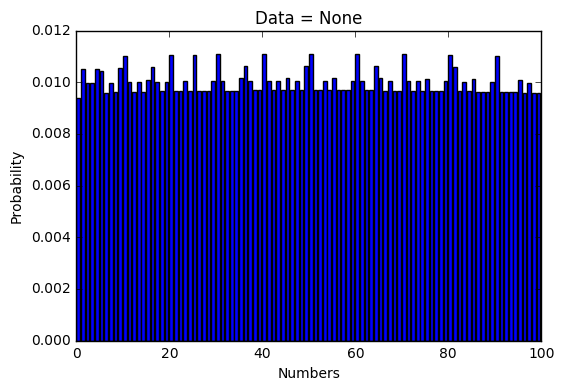

In [66]:
y = updatedppd([], hprob = 1/7)
y = [i/sum(y) for i in y]
x = np.arange(100)
plt.bar(x, y)
plt.title("Data = None")
plt.ylabel("Probability")
plt.xlabel("Numbers")

<b> As before, I would have assumed with no data, the probability of 1-100 being in the concept would either have been completely uniform or completely random. With range based hypotheses, my idea of the probabilities being completely uniform was reflected in the graph. </b>

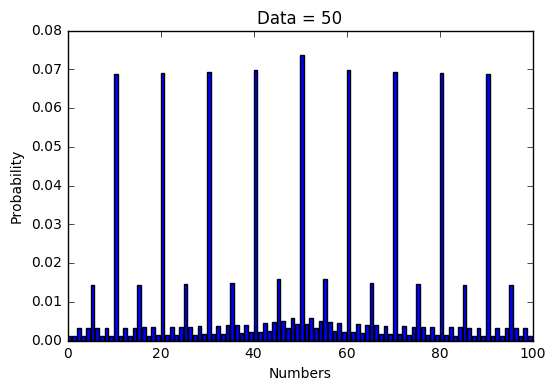

In [67]:
y = updatedppd([50], hprob = 1/7)
y = [i/sum(y) for i in y]
x = np.arange(100)
plt.bar(x, y)
plt.title("Data = 50")
plt.ylabel("Probability")
plt.xlabel("Numbers")

<b> Unchanged from the last question, with the exception of a higher peak at 50, which makes a certain amount of sense (50 is more likely to be in the concept if 50 is in the concept) </b>

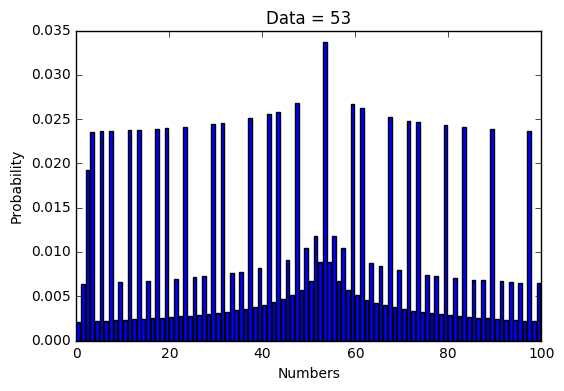

In [68]:
y = updatedppd([53], hprob = 1/7)
y = [i/sum(y) for i in y]
x = np.arange(100)
plt.bar(x, y)
plt.title("Data = 53")
plt.ylabel("Probability")
plt.xlabel("Numbers")

<b> There is a higher peak at 53, with smaller peaks at seemingly equidistant but random intervals. This slightly reflects my way of thinking a bit better, because with data reflecting just 53, I wouldn't really know what to think, other than maybe odd numbers. </b>

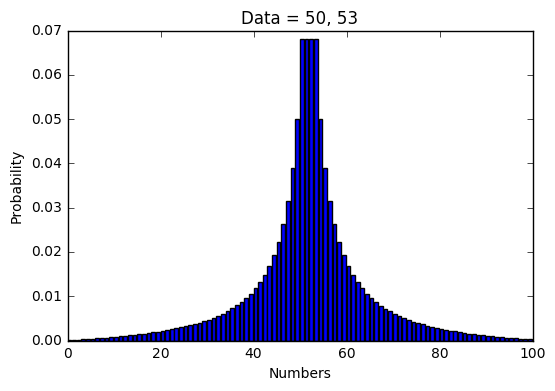

In [69]:
y = updatedppd([50, 53], hprob = 1/7)
y = [i/sum(y) for i in y]
x = np.arange(100)
plt.bar(x, y)
plt.title("Data = 50, 53")
plt.ylabel("Probability")
plt.xlabel("Numbers")

<b> With 50 and 53 and the range based hypotheses, and 50 and 53 not having any other hypotheses in common, this graph reflects my way of thinking, as I would assume with those two numbers, the concept must be proximity based; numbers in the concept must be around those two numbers. </b>

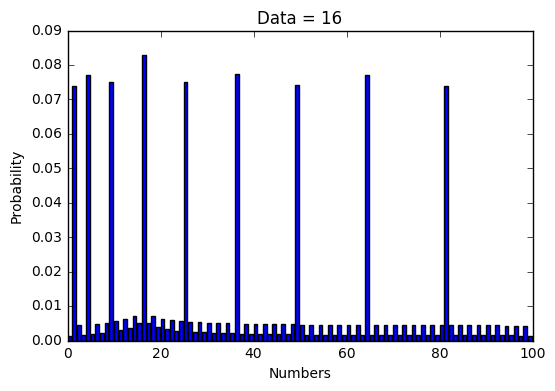

In [70]:
y = updatedppd([16], hprob = 1/7)
y = [i/sum(y) for i in y]
x = np.arange(100)
plt.bar(x, y)
plt.title("Data = 16")
plt.ylabel("Probability")
plt.xlabel("Numbers")

<b> With just 16, I would assume 16 was in the concept (higher probability) and mainly because I grew up on Minecraft, would assume the rest of the numbers in the concept was multiples of 16 (32, 48, 64...).</b>

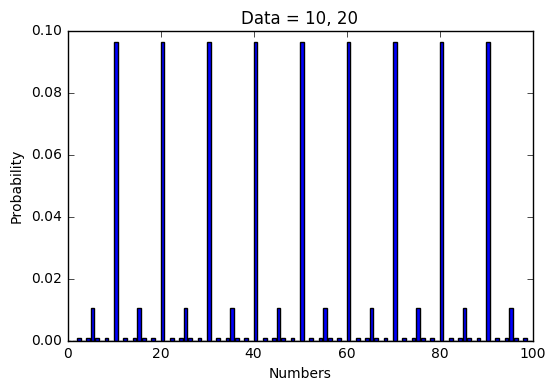

In [71]:
y = ppd([10, 20])
y = [i/sum(y) for i in y]
x = np.arange(100)
plt.bar(x, y)
plt.title("Data = 10, 20")
plt.ylabel("Probability")
plt.xlabel("Numbers")

<b> With both 10 and 20, I would assume multiples of 10, which is reflected in this graph. </b>

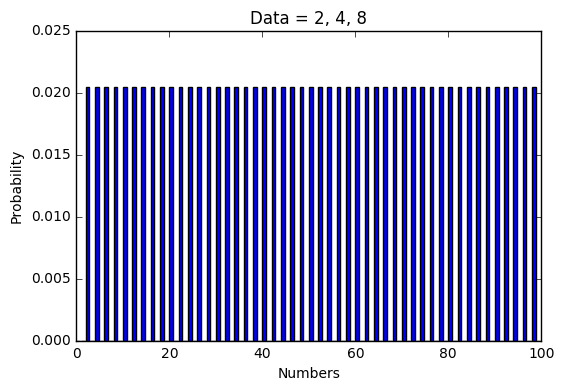

In [72]:
y = ppd([2, 4, 8])
y = [i/sum(y) for i in y]
x = np.arange(100)
plt.bar(x, y)
plt.title("Data = 2, 4, 8")
plt.ylabel("Probability")
plt.xlabel("Numbers")

<b> With 2, 4, and 8 as data, I would be relatively certain it was just even numbers, which this graph reflects. </b>

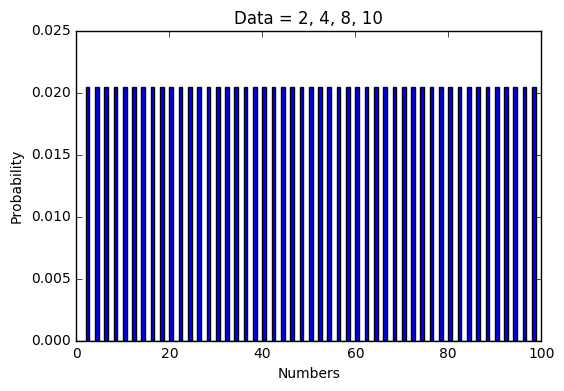

In [73]:
y = ppd([2, 4, 8, 10])
y = [i/sum(y) for i in y]
x = np.arange(100)
plt.bar(x, y)
plt.title("Data = 2, 4, 8, 10")
plt.ylabel("Probability")
plt.xlabel("Numbers")

<b> With 2, 4, 8, and 10 as numbers, even with range based hypotheses, the probabilities remained the same between this graph and the 2, 4, and 8 graph. </b>